In [84]:
############################################################################
###### Ordering Manufacture Materials using BERT: 17/03/23, @Soumya D.######
############################################################################

In [85]:
#Importing used packags

import numpy as np 
import pandas as pd 
import random as rn
import re
import nltk
import os
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from functools import partial

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer

from sentence_transformers import SentenceTransformer
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials


import umap



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdash1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Examining numpy-base: 100%|##########| 407/407 [52:18<00:00,  3.20s/it]
                                                                       

Determining conflicts:   0%|          | 0/407 [00:00<?, ?it/s]
Examining conflict for holoviews hvplot markdown anaconda panel:   0%|          | 0/407 [00:00<?, ?it/s]
Examining conflict for markdown conda-token aiosignal debugpy jupyterlab pillow yarl plotly nbclient patsy pyasn1-modules py-lief mock pyviz_comms backports protobuf pyjwt libcurl docutils pydispatcher sphinxcontrib-htmlhelp imagecodecs jsonschema mkl_random clyent jinja2-time zope.interface pyls-spyder pyasn1 entrypoints qdarkstyle pycodestyle numba pexpect click bleach brotlipy cookiecutter send2trash menuinst google-auth backports.weakref lxml scipy gensim poyo pickleshare pywin32 munkres daal4py anaconda-navigator n

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


Examining conflict for dask scikit-image distributed intake datashader xarray: : 427it [4:23:08, 63.45s/it]                          
Examining conflict for dask scikit-image distributed intake datashader xarray: : 428it [4:23:08, 71.62s/it]
Examining conflict for dask distributed: : 428it [4:23:45, 71.62s/it]                                      
Examining conflict for dask distributed: : 429it [4:23:45, 61.36s/it]
Examining conflict for anaconda distributed dask tblib: : 429it [4:24:43, 61.36s/it]
Examining conflict for anaconda distributed dask tblib: : 430it [4:24:43, 60.09s/it]
Examining conflict for holoviews dask distributed bokeh anaconda bkcharts datashader: : 430it [6:15:49, 60.09s/it]
Examining conflict for holoviews dask distributed bokeh anaconda bkcharts datashader: : 431it [6:15:49, 2041.85s/it]
Examining conflict for anyio sniffio dask distributed: : 431it [6:16:53, 2041.85s/it]                               
Examining conflict for anyio sniffio dask distributed: : 432i

plotly -> nbformat[version='>=4.2'] -> jupyter_core
jupyterlab_server -> jupyter_server[version='>=1.21,<3'] -> jupyter_core[version='>=4.12,!=5.0|>=4.12,!=5.0.*|>=4.7.0|>=4.7|>=4.6.0|>=4.4.0|>=4.6.1']

Package vs2010_runtime conflicts for:
tenacity -> python[version='>=3'] -> vs2010_runtime
pydispatcher -> python -> vs2010_runtime
idna -> python -> vs2010_runtime
parso -> python -> vs2010_runtime
pycosat -> python=3.4 -> vs2010_runtime
jsonschema -> python=3.4 -> vs2010_runtime
tblib -> python -> vs2010_runtime
jdcal -> python -> vs2010_runtime
python-slugify -> python -> vs2010_runtime
pygments -> python -> vs2010_runtime
requests -> python -> vs2010_runtime
numexpr -> python=3.4 -> vs2010_runtime
wcwidth -> python -> vs2010_runtime
google-cloud-storage -> python -> vs2010_runtime
pexpect -> python -> vs2010_runtime
pydocstyle -> python[version='>=3.4'] -> vs2010_runtime
pkginfo -> python[version='>=3'] -> vs2010_runtime
spyder-kernels -> python -> vs2010_runtime
cookiecutter -> pyth

libwebp -> vc=9 -> vs2008_runtime[version='>=9.0.30729.1,<10.0a0']
qtconsole -> python -> vs2008_runtime
tenacity -> python[version='>=2.7,<2.8.0a0'] -> vs2008_runtime
jupyter -> python -> vs2008_runtime
click -> python -> vs2008_runtime
pyzmq -> python[version='>=2.7,<2.8.0a0'] -> vs2008_runtime[version='>=9.0.30729.1,<10.0a0']
libpng -> vc=9 -> vs2008_runtime[version='>=9.0.30729.1,<10.0a0']
yapf -> python[version='>=2.7'] -> vs2008_runtime
colorama -> python -> vs2008_runtime
chardet -> python[version='>=2.7,<2.8.0a0'] -> vs2008_runtime
notebook -> python[version='>=2.7,<2.8.0a0'] -> vs2008_runtime
googleapis-common-protos -> python -> vs2008_runtime
ptyprocess -> python -> vs2008_runtime
tbb -> vc=9 -> vs2008_runtime[version='>=9.0.30729.1,<10.0a0']
ipywidgets -> python -> vs2008_runtime
tk -> vc=9 -> vs2008_runtime[version='>=9.0.30729.1,<10.0a0']
ipython -> python[version='>=2.7,<2.8.0a0'] -> vs2008_runtime
anaconda-client -> python -> vs2008_runtime
twisted -> python[version='>=

cryptography -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033|>=14.29.30139']
libzopfli -> vs2015_runtime[version='>=14.16.27012|>=14.16.27012,<15.0a0']
libaec -> vc[version='>=14.2,<15'] -> vs2015_runtime[version='>=14.15.26706|>=14.16.27033|>=14.27.29016|>=14.28.29325|>=14.32.31332|>=14.34.31931|>=14.29.30037']
nltk -> python[version='>=3.7'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033|>=14.29.30139|>=14.29.30037|>=14.27.29016,<15.0a0']
sphinxcontrib-devhelp -> python[version='>=3.5'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033']
frozenlist -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033|>=14.29.30139']
smart_open -> python[version='>=3.6'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033']
multipledispatch -> python -> vs2015_runtime[version='>=14.16.27012,<15.0a0|>=14.16.27012|>=14.16.27033']
hyperlink -> python -> vs2015_runtime[ver

entrypoints -> configparser[version='>=3.5']
importlib-metadata -> configparser[version='>=3.5']
keyring -> importlib_metadata[version='>=1'] -> configparser[version='>=3.5']
spyder -> importlib-metadata[version='<4.3'] -> configparser[version='>=3.5']
xarray -> importlib_metadata -> configparser[version='>=3.5']

Package appnope conflicts for:
widgetsnbextension -> ipykernel[version='>=4.5.1'] -> appnope
qtconsole -> ipykernel[version='>=4.1'] -> appnope
ipykernel -> appnope
ipywidgets -> ipykernel[version='>=4.5.1'] -> appnope
jupyter_server -> ipykernel -> appnope
ipython -> appnope
notebook -> ipykernel -> appnope
holoviews -> ipython[version='>=5.4.0'] -> appnope
jupyter_console -> ipykernel[version='>=6.14'] -> appnope
jupyter -> ipykernel -> appnope
matplotlib-inline -> ipython -> appnope
nbclassic -> ipykernel -> appnope
jupyterlab -> ipython -> appnope
spyder-kernels -> ipykernel[version='>=6.16.1,<7.0.0'] -> appnope
spyder -> ipython[version='>=7.31.1,<9.0.0'] -> appnope

Pac

jsonschema -> importlib-metadata -> pypy3.9[version='7.3.11.*|>=7.3.8|>=7.3.9|7.3.9.*|7.3.8.*']
imageio -> numpy -> pypy3.9[version='7.3.11.*|>=7.3.11|>=7.3.9|>=7.3.8|7.3.9.*|7.3.8.*']
ipywidgets -> python[version='>=3.7'] -> pypy3.9[version='7.3.11.*|7.3.9.*|7.3.8.*']
mypy_extensions -> python[version='>=3.5'] -> pypy3.9[version='7.3.*|7.3.11.*|7.3.9.*|7.3.8.*']
protobuf -> python[version='>=3.9,<3.10.0a0'] -> pypy3.9[version='7.3.*|7.3.11.*|7.3.9.*|7.3.8.*']
scikit-learn -> numpy[version='>=1.21.6,<2.0a0'] -> pypy3.9[version='7.3.11.*|>=7.3.11|>=7.3.9|>=7.3.8|7.3.9.*|7.3.8.*']
mock -> python[version='>=3.6'] -> pypy3.9[version='7.3.*|7.3.11.*|7.3.9.*|7.3.8.*']
plotly -> python[version='>=3.6'] -> pypy3.9[version='7.3.11.*|7.3.9.*|7.3.8.*|>=7.3.9|>=7.3.8']
aiosignal -> frozenlist[version='>=1.1.0'] -> pypy3.9[version='7.3.11.*|>=7.3.8|>=7.3.9|7.3.9.*|7.3.8.*']
msgpack-python -> python[version='>=3.9,<3.10.0a0'] -> pypy3.9[version='7.3.*|7.3.11.*|7.3.9.*|7.3.8.*']
mkl_random -> numpy[v

backports.weakref -> python[version='>=3.6'] -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.12,<1.3.0a0|>=1.2.13,<1.3.0a0']
frozenlist -> python[version='>=3.8,<3.9.0a0'] -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.13,<1.3.0a0|>=1.2.12,<1.3.0a0']
defusedxml -> python[version='>=3.6'] -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.12,<1.3.0a0|>=1.2.13,<1.3.0a0']
pyasn1 -> python -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.12,<1.3.0a0|>=1.2.13,<1.3.0a0']
binaryornot -> python -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.12,<1.3.0a0|>=1.2.13,<1.3.0a0']
pyyaml -> python[version='>=3.9,<3.10.0a0'] -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.13,<1.3.0a0|>=1.2.12,<1.3.0a0']
pillow -> zlib[version='>=1.2.12,<1.3.0a0'] -> libzlib[version='1.2.11|1.2.11|1.2.11|1.2.12|1.2.12|1.2.12|1.2.12|1.2.12|1.2.13',build='h8ffe710_1014|h8ffe710_0|h8ffe710_2|hcfcfb64_3|hcfcfb64_4|h8ffe710_1|h8ffe710_1013|h8ffe710_1012']
babel -> python[version='>=3.7'] -> libzlib[version='>=1.2.11,<1.3.0a0|>=1.2.12,<1.3.0a0|>=1.2.13

sqlalchemy -> python[version='>=3.10,<3.11.0a0'] -> pip
imagesize -> python[version='>=3.4'] -> pip
debugpy -> python[version='>=3.10,<3.11.0a0'] -> pip
yapf -> python[version='>=2.7'] -> pip
grpcio -> python[version='>=3.8,<3.9.0a0'] -> pip
toml -> python[version='>=2.7'] -> pip
watchdog -> python[version='>=3.10,<3.11.0a0'] -> pip
jupyter_client -> python[version='>=3.8'] -> pip
sip -> python[version='>=3.9,<3.10.0a0'] -> pip
google-cloud-core -> python[version='>=3.7'] -> pip
conda-package-handling -> python[version='>=3.7'] -> pip
pyerfa -> python[version='>=3.8,<3.9.0a0'] -> pip
ipywidgets -> python[version='>=3.7'] -> pip
charset-normalizer -> python[version='>=3.7'] -> pip
rsa -> python[version='>=3.6'] -> pip
pywin32-ctypes -> python[version='>=3.11,<3.12.0a0'] -> pip
nbclassic -> python[version='>=3.7'] -> pip
itsdangerous -> python[version='>=3.7'] -> pip
comtypes -> python[version='>=3.10,<3.11.0a0'] -> pip
anaconda-client -> python[version='>=3.6'] -> pip
flask -> python[ve

jupyterlab_server -> requests[version='>=2.28'] -> urllib3[version='>=1.21.1,<1.22|>=1.21.1,<1.23|>=1.21.1,<1.24|>=1.21.1,<1.25|>=1.21.1,<1.26,!=1.25.0,!=1.25.1|>=1.21.1,<1.27']
pip -> requests -> urllib3[version='>=1.21.1,<1.22|>=1.21.1,<1.23|>=1.21.1,<1.24|>=1.21.1,<1.25|>=1.21.1,<1.26,!=1.25.0,!=1.25.1|>=1.21.1,<1.27']
datashader -> requests -> urllib3[version='>=1.21.1,<1.22|>=1.21.1,<1.23|>=1.21.1,<1.24|>=1.21.1,<1.25|>=1.21.1,<1.26,!=1.25.0,!=1.25.1|>=1.21.1,<1.27']
smart_open -> requests -> urllib3[version='>=1.21.1,<1.22|>=1.21.1,<1.23|>=1.21.1,<1.24|>=1.21.1,<1.25|>=1.21.1,<1.26,!=1.25.0,!=1.25.1|>=1.21.1,<1.27']
dask -> distributed[version='>=2023.3.1,<2023.3.2.0a0'] -> urllib3[version='>=1.24.3']
panel -> requests -> urllib3[version='>=1.21.1,<1.22|>=1.21.1,<1.23|>=1.21.1,<1.24|>=1.21.1,<1.25|>=1.21.1,<1.26,!=1.25.0,!=1.25.1|>=1.21.1,<1.27']
jupyter_server -> requests-unixsocket -> urllib3[version='>=1.16,<2|>=1.8,<2']
google-cloud-core -> requests[version='>=2.18.0,<3.0.0de

conda-build -> conda-verify -> backports.tempfile
anaconda==2022.05=py39_0 -> backports.tempfile==1.0=pyhd3eb1b0_1
scikit-image -> pooch[version='>=0.5.2'] -> backports.tempfile

Package entrypoints conflicts for:
pyjwt -> flake8 -> entrypoints[version='>=0.3.0,<0.4.0']
jupyterlab_server -> entrypoints[version='>=0.2.2']
ipykernel -> jupyter_client[version='>=6.1.12'] -> entrypoints
nbconvert -> entrypoints[version='>=0.2.2']
spyder -> keyring[version='>=17.0.0'] -> entrypoints[version='>=0.2.2']
jupyter_client -> entrypoints
notebook -> jupyter_client[version='>=5.3.4'] -> entrypoints[version='>=0.2.2']
jupyter_server -> jupyter_client[version='>=7.4.4'] -> entrypoints[version='>=0.2.2']
flake8 -> entrypoints[version='>=0.3.0,<0.4.0']
jupyter_console -> jupyter_client[version='>=7.0.0'] -> entrypoints
intake -> entrypoints
jupyter -> nbconvert -> entrypoints[version='>=0.2.2']
nbclassic -> jupyter_client[version='>=6.1.1'] -> entrypoints[version='>=0.2.2']
qtconsole -> jupyter_client[

scrapy -> parsel[version='>=1.5.0'] -> functools32
spyder -> jsonschema[version='>=3.2.0'] -> functools32
seaborn -> matplotlib-base[version='>=2.1.2'] -> functools32
nltk -> matplotlib -> functools32
flake8 -> functools32
tomli -> tomlkit -> functools32[version='>=3.2.3,<4.0.0']
jsonschema -> functools32
holoviews -> matplotlib-base[version='>=2.2'] -> functools32
nbformat -> jsonschema[version='>=2.6'] -> functools32
bokeh -> matplotlib -> functools32
jupyterlab_server -> jsonschema[version='>=3.0.1'] -> functools32
matplotlib-base -> functools32
parsel -> functools32
matplotlib -> functools32
itemloaders -> parsel[version='>=1.5.0'] -> functools32

Package send2trash conflicts for:
anaconda==2022.05=py39_0 -> send2trash==1.8.0=pyhd3eb1b0_1
jupyter_server -> send2trash
jupyter -> notebook -> send2trash[version='>=1.5.0|>=1.8.0']
notebook -> send2trash[version='>=1.5.0|>=1.8.0']
nbclassic -> jupyter_server[version='>=1.8'] -> send2trash[version='>=1.5.0']
ipywidgets -> notebook -> sen

In [33]:
#To remove warninigs

import warnings
warnings.filterwarnings('ignore')

In [34]:
#Loadinig the data

data_raw = pd.read_excel(r'../data/data_sample.xlsx')

In [35]:
# size of dataframe
print(data_raw.shape)
# display the head of data
display(data_raw.head())

(9, 34)


,Unnamed: 0,Name,Product_ID,Product_UserTypeID,Product_ParentID,AT_MaraMatkl,AT_MaraBshmCax3D,AT_SAPID,AT_MaraExtwg,AT_MaraZeinr,...,AT_MaraBshmEtnr,AT_MaraMtart,AT_MaraNormt,AT_MaraLabor,AT_MaraBshmQmt,AT_MaraMeins,AT_MaraEan11,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID
0,0,9001422279 - Lens Head Screw M4x8,MAT_928319,Material,PhysicalMaterialInbox,H002 - Customized screws,6.010000e+13,9001422279,NaN,6.010000e+13,...,10024867.0,Materials which are externally procured,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
1,1,9001730689 - CP body laser printed WT45HV14FR,MAT_928320,Material,PhysicalMaterialInbox,R239 - xxx - do not use anymore,NaN,9001730689,NaN,NaN,...,11051383.0,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),4.242010e+12,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
2,2,"9001730699 - USER MA. SE (WT45HV14FR), FR",MAT_928323,Material,PhysicalMaterialInbox,X810 - Printed material (general),NaN,9001730699,NaN,NaN,...,18068836.0,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),NaN,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
3,3,9001731054 - fascia panel GV650A.UC Int White...,MAT_928324,Material,PhysicalMaterialInbox,R250 - Injected parts (general),6.010000e+13,9001731054,NaN,6.010000e+13,...,NaN,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM
4,4,9001762412 - Cable Harness operat. EE 590 SP....,MAT_928325,Material,PhysicalMaterialInbox,L592 - IDC+IDC jumpers,6.010000e+13,9001762412,NaN,6.010000e+13,...,NaN,Materials which are externally procured,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM


In [36]:
#details datafarme information
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9 non-null      int64  
 1   Name                 9 non-null      object 
 2   Product_ID           9 non-null      object 
 3   Product_UserTypeID   9 non-null      object 
 4   Product_ParentID     9 non-null      object 
 5   AT_MaraMatkl         9 non-null      object 
 6   AT_MaraBshmCax3D     4 non-null      float64
 7   AT_SAPID             9 non-null      int64  
 8   AT_MaraExtwg         0 non-null      float64
 9   AT_MaraZeinr         4 non-null      float64
 10  AT_MaraNtgew         9 non-null      float64
 11  Revision             9 non-null      object 
 12  AT_MaraWrkst         1 non-null      object 
 13  AT_MaraNumtp         1 non-null      object 
 14  AT_MaraMstae         0 non-null      float64
 15  AT_MaraGroes         2 non-null      object 

In [37]:
#Copying a working df

data = data_raw

In [38]:
data['Name'] = data['Name'].astype(str)

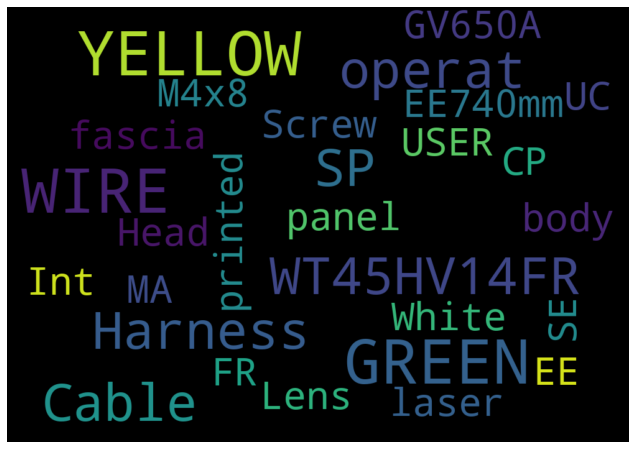

In [39]:
txt = ' '.join(txt for txt in data.Name )
plt.figure(figsize=(15, 8))
wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100, 
    width=1000, 
    height=700
).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Basic Text Cleaninig 

In [40]:
#function to clan punctuation

def clean_punctuation(text):
    result = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',',') )
    return result

In [41]:
# function to clean unify whitespaces

def clean_unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text )
    return cleaned_string

In [42]:
#Clean Numeric

def clean_num(texts):
    output = re.sub(r'\d+', '', texts )
    return output

In [43]:
#Basic characters cleaninig 

def basic_clean(txt):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', txt)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [44]:
#Stop word cleaning 

stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

def clean_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop ]
    return ' '.join(text)

In [45]:
#function to use stemming to normalize words

def Stemming(text):
    stem = []
    stopword = stopwords.words('english')
    snowball_stemmer = SnowballStemmer('english')
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [ snowball_stemmer.stem(word) for word in word_tokens ]
    stem = ' '.join(stemmed_word)
    return stem

#### Applying all these above methods to data[ 'Name' ]

In [46]:
def cleaning(data, Name):
    data_cleaned  = data.copy()
    data_cleaned[Name] = data_cleaned['Name']
    data_cleaned[Name] = data_cleaned[Name].apply(clean_punctuation)
    data_cleaned[Name] = data_cleaned[Name].apply(clean_unify_whitespaces)
    data_cleaned[Name] = data_cleaned[Name].apply(clean_num)
    data_cleaned[Name] = data_cleaned[Name].apply(basic_clean)
    data_cleaned[Name] = data_cleaned[Name].apply(clean_stopwords)
    data_cleaned[Name] = data_cleaned[Name].apply(Stemming)
    return data_cleaned

data_cleaned = cleaning(data, 'clean_name' )

In [47]:
data_cleaned.head(5)

,Unnamed: 0,Name,Product_ID,Product_UserTypeID,Product_ParentID,AT_MaraMatkl,AT_MaraBshmCax3D,AT_SAPID,AT_MaraExtwg,AT_MaraZeinr,...,AT_MaraMtart,AT_MaraNormt,AT_MaraLabor,AT_MaraBshmQmt,AT_MaraMeins,AT_MaraEan11,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID,clean_name
0,0,9001422279 - Lens Head Screw M4x8,MAT_928319,Material,PhysicalMaterialInbox,H002 - Customized screws,6.010000e+13,9001422279,NaN,6.010000e+13,...,Materials which are externally procured,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,- len head screw mx
1,1,9001730689 - CP body laser printed WT45HV14FR,MAT_928320,Material,PhysicalMaterialInbox,R239 - xxx - do not use anymore,NaN,9001730689,NaN,NaN,...,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),4.242010e+12,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,- cp bodi laser print wthvfr
2,2,"9001730699 - USER MA. SE (WT45HV14FR), FR",MAT_928323,Material,PhysicalMaterialInbox,X810 - Printed material (general),NaN,9001730699,NaN,NaN,...,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),NaN,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,- user se ( wthvfr ) fr
3,3,9001731054 - fascia panel GV650A.UC Int White...,MAT_928324,Material,PhysicalMaterialInbox,R250 - Injected parts (general),6.010000e+13,9001731054,NaN,6.010000e+13,...,Materials which can be potentially produced in...,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM,- fascia panel gvauc int white
4,4,9001762412 - Cable Harness operat. EE 590 SP....,MAT_928325,Material,PhysicalMaterialInbox,L592 - IDC+IDC jumpers,6.010000e+13,9001762412,NaN,6.010000e+13,...,Materials which are externally procured,NaN,NaN,NaN,piece(s),NaN,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,- cabl har operat ee sp


In [48]:
data_cleaned.columns.values.tolist()

['Unnamed: 0',
 'Name',
 'Product_ID',
 'Product_UserTypeID',
 'Product_ParentID',
 'AT_MaraMatkl',
 'AT_MaraBshmCax3D',
 'AT_SAPID',
 'AT_MaraExtwg',
 'AT_MaraZeinr',
 'AT_MaraNtgew',
 'Revision',
 'AT_MaraWrkst',
 'AT_MaraNumtp',
 'AT_MaraMstae',
 'AT_MaraGroes',
 'AT_MaraMaktx',
 'AT_LeadingSystem',
 'AT_MaraBshmPcomp',
 'AT_MaraBshmEret',
 'AT_MaraBismt',
 'AT_MaraBrgew',
 'AT_MaraBshmComp',
 'AT_MaraVolum',
 'AT_MaraBshmEtnr',
 'AT_MaraMtart',
 'AT_MaraNormt',
 'AT_MaraLabor',
 'AT_MaraBshmQmt',
 'AT_MaraMeins',
 'AT_MaraEan11',
 'AT_MaraNtgew_UnitID',
 'AT_MaraVolum_UnitID',
 'AT_MaraBrgew_UnitID',
 'clean_name']

In [49]:
df = data_cleaned[['Name','clean_name','AT_MaraMatkl','AT_MaraMaktx','AT_MaraBrgew','AT_MaraMtart','AT_MaraLabor','AT_MaraBrgew_UnitID']] 

In [50]:
df

,Name,clean_name,AT_MaraMatkl,AT_MaraMaktx,AT_MaraBrgew,AT_MaraMtart,AT_MaraLabor,AT_MaraBrgew_UnitID
0,9001422279 - Lens Head Screw M4x8,- len head screw mx,H002 - Customized screws,Lens Head Screw M4x8,1.300,Materials which are externally procured,NaN,unece.unit.GRM
1,9001730689 - CP body laser printed WT45HV14FR,- cp bodi laser print wthvfr,R239 - xxx - do not use anymore,CP body laser printed WT45HV14FR,0.318,Materials which can be potentially produced in...,NaN,unece.unit.KGM
2,"9001730699 - USER MA. SE (WT45HV14FR), FR",- user se ( wthvfr ) fr,X810 - Printed material (general),"USER MA. SE (WT45HV14FR), FR",0.020,Materials which can be potentially produced in...,NaN,unece.unit.KGM
3,9001731054 - fascia panel GV650A.UC Int White...,- fascia panel gvauc int white,R250 - Injected parts (general),fascia panel GV650A.UC Int White 300,0.000,Materials which can be potentially produced in...,NaN,unece.unit.GRM
4,9001762412 - Cable Harness operat. EE 590 SP....,- cabl har operat ee sp,L592 - IDC+IDC jumpers,Cable Harness operat. EE 590 SP........,26.800,Materials which are externally procured,NaN,unece.unit.GRM
5,9001762413 - Cable Harness operat. EE740mm SP....,- cabl har operat eemm sp,L592 - IDC+IDC jumpers,Cable Harness operat. EE740mm SP........,28.700,Materials which are externally procured,NaN,unece.unit.GRM
6,9001766218 - WIRE YELLOW-GREEN,- wire yellow-green,01 - Dummy,WIRE YELLOW-GREEN,0.000,Materials which can be potentially produced in...,NaN,unece.unit.KGM
7,9001766289 - WIRE YELLOW-GREEN,- wire yellow-green,01 - Dummy,WIRE YELLOW-GREEN,0.000,Materials which can be potentially produced in...,NaN,unece.unit.KGM
8,9001766290 - WIRE YELLOW-GREEN,- wire yellow-green,01 - Dummy,WIRE YELLOW-GREEN,0.000,Materials which can be potentially produced in...,NaN,unece.unit.KGM


In [51]:

all_intents = df.clean_name.tolist()

print(all_intents)

['- len head screw mx', '- cp bodi laser print wthvfr', '- user se ( wthvfr ) fr', '- fascia panel gvauc int white', '- cabl har operat ee sp', '- cabl har operat eemm sp', '- wire yellow-green', '- wire yellow-green', '- wire yellow-green']


In [52]:
all_sents = []

for intent in all_intents:
    for sent in nltk.sent_tokenize(intent):
        if len(sent.split()) > 2:
            all_sents.append(sent)

print(len(all_sents))

all_intent = all_sents

9


In [53]:
#Sentence Embedding


def embed(model, model_type, sentences ):
    if model_type == 'use':
        embeddings  = model(sentences)
    elif model_type == 'sentence transformer':
        embeddings = model.encode(sentences)
        
    return embeddings
        
model_st1 = SentenceTransformer('all-mpnet-base-v2', device='cpu' )

embeddings_st1 = embed(model_st1, 'sentence transformer', all_intents )

In [54]:
embeddings_st1.shape

(9, 768)



#### Abit of ideation with Deimensionality Reduction with K-means cluster and HDBScan

Following are four common methods of hyperparameter optimization for machine learning in order of increasing efficiency:
Manual
Grid search
Random search
Bayesian model-based optimization
The one-sentence summary of Bayesian hyperparameter optimization is: build a probability model of the objective function and use it to select the most promising hyperparameters to evaluate in the true objective function.





In [55]:
hspace = {
    "n_neighbors": hp.choice('n_neighbors', range(3,32)),
    "n_components": hp.choice('n_components', range(3,32)),
    "min_cluster_size": hp.choice('min_cluster_size', range(2,32)),
    "random_state": 42
}

label_lower = 10
label_upper = 100
max_evals = 25 # change it to 50 or 100 for extra steps as you wish.

In [77]:
def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize

    Arguments:
        params: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', 'random_state' and
               their values to use for evaluation
        embeddings: embeddings to use
        label_lower: int, lower end of range of number of expected clusters
        label_upper: int, upper end of range of number of expected clusters

    Returns:
        loss: cost function result incorporating penalties for falling
              outside desired range for number of clusters
        label_count: int, number of unique cluster labels, including noise
        status: string, hypoeropt status

        """
    
    clusters = generate_clusters(embeddings, 
                                 n_neighbors = params['n_neighbors'], 
                                 n_components = params['n_components'], 
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])
    
    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
    
    #15% penalty on the cost function if outside the desired range of groups
    if (label_count < label_lower) | (label_count > label_upper):
        penalty = 0.15 
    else:
        penalty = 0
    
    loss = cost + penalty
    
    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

In [75]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      min_samples = None,
                      random_state = None):
    """
    Returns HDBSCAN objects after first performing dimensionality reduction using UMAP
    
    Arguments:
        message_embeddings: embeddings to use
        n_neighbors: int, UMAP hyperparameter n_neighbors
        n_components: int, UMAP hyperparameter n_components
        min_cluster_size: int, HDBSCAN hyperparameter min_cluster_size
        min_samples: int, HDBSCAN hyperparameter min_samples
        random_state: int, random seed
        
    Returns:
        clusters: HDBSCAN object of clusters
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors = n_neighbors, 
                                n_components = n_components, 
                                metric = 'cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, 
                               min_samples = min_samples,
                               metric='euclidean', 
                               gen_min_span_tree=True,
                               cluster_selection_method='eom').fit(umap_embeddings)
    
    return clusters

In [76]:
def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayesian search on hyperparameter space using hyperopt

    Arguments:
        embeddings: embeddings to use
        space: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', and 'random_state' and
               values that use built-in hyperopt functions to define
               search spaces for each
        label_lower: int, lower end of range of number of expected clusters
        label_upper: int, upper end of range of number of expected clusters
        max_evals: int, maximum number of parameter combinations to try

    Saves the following to instance variables:
        best_params: dict, contains keys for 'n_neighbors', 'n_components',
               'min_cluster_size', 'min_samples', and 'random_state' and
               values associated with lowest cost scenario tested
        best_clusters: HDBSCAN object associated with lowest cost scenario
                       tested
        trials: hyperopt trials object for search

        """
    
    trials = Trials()
    fmin_objective = partial(objective, 
                             embeddings=embeddings, 
                             label_lower=label_lower,
                             label_upper=label_upper)
    
    best = fmin(fmin_objective, 
                space = space, 
                algo=tpe.suggest,
                max_evals=max_evals, 
                trials=trials)

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print (f"label count: {trials.best_trial['result']['label_count']}")
    
    best_clusters = generate_clusters(embeddings, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])
    
    return best_params, best_clusters, trials

In [78]:
best_params_use, best_clusters_use, trials_use = bayesian_search(embeddings_st1, 
                                                                 space=hspace, 
                                                                 label_lower=label_lower, 
                                                                 label_upper=label_upper, 
                                                                 max_evals=max_evals)

  0%|                                                                           | 0/25 [00:00<?, ?trial/s, best loss=?]

job exception: module 'umap' has no attribute 'UMAP'



  0%|                                                                           | 0/25 [00:00<?, ?trial/s, best loss=?]


AttributeError: module 'umap' has no attribute 'UMAP'